In [1]:
from prody import *
from numpy import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import fnmatch
import os
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
structure_names_c = ["5hdy_c","5heb_c","5hed_c","5het_c","5hey_c","5hf1_c","5hf4_c","5hfb_c","5hfc_c","5hfd_c","5hfe_c","5hff_c"]
variables_c = []
variable_names_c = []

In [3]:
structure_names = ["5hdy","5heb","5hed","5het","5hey","5hf1","5hf4","5hfb","5hfc","5hfd","5hfe","5hff"]
variables = []
variable_names = []

In [4]:
for str_name in structure_names_c:
    array_1 = np.loadtxt(str(str_name[:-2]+"_eq_sasa_charged.dat"))
    array_2 = np.loadtxt(str(str_name[:-2]+"_protein_eq_sasa_charged.dat"))
    arrays = np.concatenate((array_1,array_2),axis= None)
    print(str_name[1:])
    exec("%s = %s" % (str_name[1:],"arrays"))
    exec("variables_c.append(%s)" % (str_name[1:]))
    variable_names_c.append(str_name[1:])

hdy_c
heb_c
hed_c
het_c
hey_c
hf1_c
hf4_c
hfb_c
hfc_c
hfd_c
hfe_c
hff_c


In [5]:
for str_name in structure_names:
    array_1 = np.loadtxt(str(str_name+"_eq_sasa_apolar.dat"))
    array_2 = np.loadtxt(str(str_name+"_protein_eq_sasa_apolar.dat"))
    arrays = np.concatenate((array_1,array_2),axis= None)
    print(str_name[1:])
    exec("%s = %s" % (str_name[1:],"arrays"))
    exec("variables.append(%s)" % (str_name[1:]))
    variable_names.append(str_name[1:])

hdy
heb
hed
het
hey
hf1
hf4
hfb
hfc
hfd
hfe
hff


In [6]:
variables_flat_c = np.asarray(variables_c).flatten()
len(variables_flat_c)

28800

In [7]:
variables_flat = np.asarray(variables).flatten()
len(variables_flat)

28800

In [8]:
print(np.mean(variables_flat_c))
print(np.median(variables_flat_c))
print(np.std(variables_flat_c))
print(np.max(variables_flat_c))
print(np.min(variables_flat_c))
print(np.sum(variables_flat_c))

762.6842307387458
767.1388549804688
59.354057824396854
959.04541015625
498.1779479980469
21965305.84527588


In [9]:
print(np.mean(variables_flat))
print(np.median(variables_flat))
print(np.std(variables_flat))
print(np.max(variables_flat))
print(np.min(variables_flat))
print(np.sum(variables_flat))

585.5618950208028
593.4679870605469
114.36712437419874
845.401123046875
326.16595458984375
16864182.57659912


In [10]:
print(np.add(variables_flat_c, variables_flat).sum())

38829488.421875


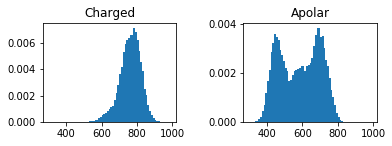

In [11]:
tail_dist_hist_c = np.histogram(variables_flat_c,bins=np.arange(300,1000,10), density=True)
plt.subplot(221)
plt.hist(variables_flat_c, bins=np.arange(300,1000,10), density=True);
plt.title("Charged")
#plt.show()
#plt.close()

tail_dist_hist = np.histogram(variables_flat,bins=np.arange(300,1000,10), density=True)
plt.subplot(222)
plt.hist(variables_flat, bins=np.arange(300,1000,10), density=True);
plt.title("Apolar")
plt.subplots_adjust(wspace = 0.5)
plt.savefig("aLL_sasa_tail.png")
plt.show()
plt.close()

In [12]:
print(kurtosis(tail_dist_hist_c[0]))
print(skew(tail_dist_hist_c[0]))
print(kurtosis(tail_dist_hist[0]))
print(skew(tail_dist_hist[0]))

0.4701307817427227
1.4210347994492016
-1.417195008290052
0.20675309994853133


hdy calculations


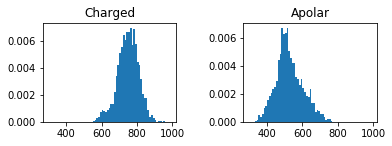

heb calculations


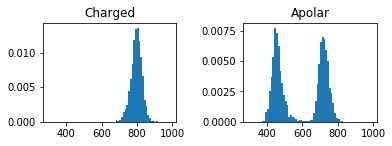

hed calculations


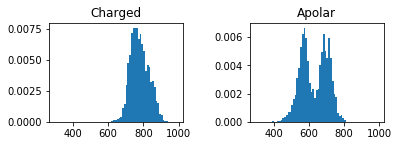

het calculations


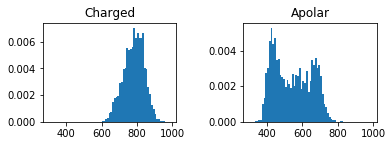

hey calculations


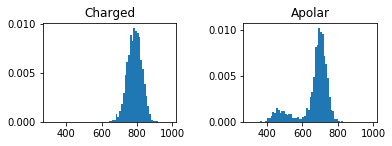

hf1 calculations


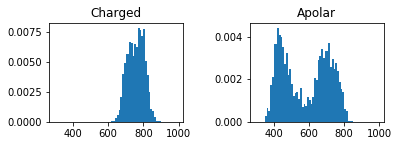

hf4 calculations


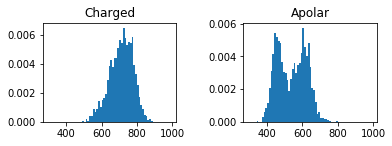

hfb calculations


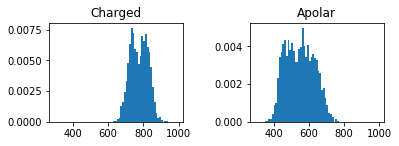

hfc calculations


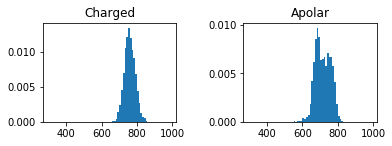

hfd calculations


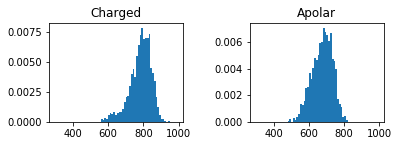

hfe calculations


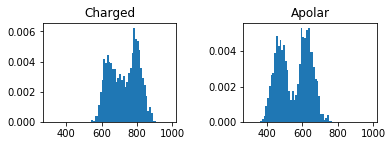

hff calculations


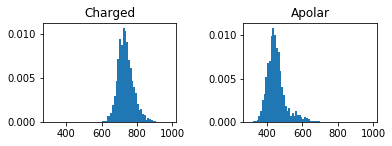

In [13]:
for i in range(12):
    print(variable_names[i]+" calculations")

    tail_dist_hist_c = np.histogram(variables_c[i],bins=np.arange(300,1000,10), density=True)
    np.savetxt(variable_names[i]+"_charged_sasa_dist.dat", tail_dist_hist_c[0])
    tail_dist_hist_a = np.histogram(variables[i],bins=np.arange(300,1000,10), density=True)
    np.savetxt(variable_names[i]+"_apolar_sasa_dist.dat", tail_dist_hist_a[0])

    plt.subplot(221)
    plt.hist(variables_c[i], bins=np.arange(300,1000,10), density=True);
    plt.title("Charged")


    plt.subplot(222)
    tail_dist_hist = np.histogram(variables[i],bins=np.arange(300,1000,10), density=True)
    plt.hist(variables[i], bins=np.arange(300,1000,10), density=True);
    plt.title("Apolar")
    plt.subplots_adjust(wspace = 0.5)
    plt.savefig(variable_names[i]+"_sasa_tail.png")
    plt.show()
    plt.close()


In [14]:
np.savetxt("bins_sasa.dat"\
           ,np.arange(300,1000,10), fmt="%i")

In [58]:
for i in range(12):
    print(variable_names_c[i]+" calculations")
    print(np.mean(variables_c[i]), np.std(variables_c[i]))

hdy_c calculations
750.1249098968506 59.81851476397893
heb_c calculations
797.7085075378418 31.720001013080534
hed_c calculations
779.2977045186361 51.43435420915036
het_c calculations
783.3862519327799 58.09151175107336
hey_c calculations
786.8270370992025 40.0641230293643
hf1_c calculations
758.2821194966634 46.98943838465286
hf4_c calculations
712.157621383667 66.18344414171537
hfb_c calculations
776.0734106953939 50.094059744632524
hfc_c calculations
759.8304090118409 30.60147788619755
hfd_c calculations
784.5348738098145 61.69145829885561
hfe_c calculations
727.9724243672689 80.64187683850092
hff_c calculations
736.0154991149902 43.55355194948013


## Error of STD

In [55]:
for i in range(12):
    print(variable_names_c[i]+" calculations")
#    print(np.std(variables_c[i]))
    temp_var = variables_c[i]
    temp_var_chunks = np.split(temp_var, 6)
#    print(np.shape(temp_var_chunks))
    dev_of_chunks = np.std(temp_var_chunks, axis=1)
    dev_of_chunks_mean = np.mean(dev_of_chunks)
    dev_of_chunks_error = np.std(dev_of_chunks)/np.sqrt(6)
    print(dev_of_chunks_mean, dev_of_chunks_error)
    #print(np.std(temp_var_2,axis=1))

hdy_c calculations
43.62845318988273 2.8077597372240954
heb_c calculations
29.687865610042255 1.3131464882610826
hed_c calculations
39.5725799969442 2.4753347355458972
het_c calculations
49.32572200948527 7.163877261536062
hey_c calculations
36.916422007331306 1.7638493879813284
hf1_c calculations
35.035427480501255 3.0223106183838
hf4_c calculations
47.95599593878882 5.832513821395748
hfb_c calculations
27.104441539364444 1.3373386506036473
hfc_c calculations
25.521809962702516 0.6780784914757965
hfd_c calculations
51.97069690082034 4.972691464525234
hfe_c calculations
36.98101840966107 3.56081721927818
hff_c calculations
37.43889493292031 3.041314735274866


## Error of MEAN

In [57]:
for i in range(12):
    print(variable_names_c[i]+" calculations")
#    print(np.std(variables_c[i]))
    temp_var = variables_c[i]
    temp_var_chunks = np.split(temp_var, 6)
#    print(np.shape(temp_var_chunks))
    mean_of_chunks = np.mean(temp_var_chunks, axis=1)
    mean_of_chunks_mean = np.mean(mean_of_chunks)
    mean_of_chunks_error = np.std(mean_of_chunks)/np.sqrt(6)
    print(mean_of_chunks_mean, mean_of_chunks_error)
    #print(np.std(temp_var_2,axis=1))

hdy_c calculations
750.1249098968506 16.469728253044117
heb_c calculations
797.7085075378418 4.3673595682842965
hed_c calculations
779.2977045186361 13.182943607681066
het_c calculations
783.3862519327799 10.276754199470085
hey_c calculations
786.8270370992024 6.105253916474599
hf1_c calculations
758.2821194966633 12.421218218030877
hf4_c calculations
712.157621383667 17.68408619407947
hfb_c calculations
776.0734106953938 17.146589663543388
hfc_c calculations
759.8304090118409 6.859651623849963
hfd_c calculations
784.5348738098145 12.626141719162993
hfe_c calculations
727.9724243672689 29.038595184700938
hff_c calculations
736.0154991149902 8.560991586880355
